
- Questions:
  1. What are the top 5 countries with the highest internet use (by population share)?
  2. How many people had internet access in those countries in 2019?
  3. What are the top 5 countries with the highest internet use for each of the following regions:  'Middle East & North Africa', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'Europe & Central Asia'?
  4. Create a visualization for those five regions' internet usage over time.
  5. What are the 5 countries with the most internet users?
  6. What is the correlation between internet usage (population share) and broadband subscriptions for 2019?




##  The data

#### DATA ([source](https://ourworldindata.org/internet)):

#### internet
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2019.
- "Internet_usage" -  The share of the entity's population who have used the internet in the last three months.

#### people
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2020.
- "Users" - The number of people who have used the internet in the last three months for that country, region, or group.

#### broadband
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1998 to 2020.
- "Broadband_Subscriptions" - The number of fixed subscriptions to high-speed internet at downstream speeds >= 256 kbit/s for that country, region, or group.



### Import lib

In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from pandasql import sqldf
import pandas as pd
import numpy as np


### Read & Investigate Data

In [2]:
internet = pd.read_csv('data/internet.csv')

internet.head(2)

,Entity,Code,Year,Internet_Usage
0,Afghanistan,AFG,1990,0.0
1,Afghanistan,AFG,1991,0.0


In [3]:
internet.info()
## nulls in Code 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7089 entries, 0 to 7088
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entity          7089 non-null   object 
 1   Code            5761 non-null   object 
 2   Year            7089 non-null   int64  
 3   Internet_Usage  7089 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 221.7+ KB


In [4]:
people = pd.read_csv('data/people.csv')
people.head(2)

,Entity,Code,Year,Users
0,Afghanistan,AFG,1990,0
1,Afghanistan,AFG,1991,0


In [5]:
people.info()
## nulls in code

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6379 entries, 0 to 6378
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Entity  6379 non-null   object
 1   Code    6072 non-null   object
 2   Year    6379 non-null   int64 
 3   Users   6379 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 199.5+ KB


In [6]:
broadband = pd.read_csv('data/broadband.csv')
broadband.head(2) 


,Entity,Code,Year,Broadband_Subscriptions
0,Afghanistan,AFG,2004,0.000809
1,Afghanistan,AFG,2005,0.000858


In [7]:
broadband.info() 
## nulls in code

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   3888 non-null   object 
 1   Code                     3617 non-null   object 
 2   Year                     3888 non-null   int64  
 3   Broadband_Subscriptions  3888 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 121.6+ KB


In [8]:
#this table is related to the nulls in Code it has the groub of each country 
EntityGroup=pd.read_excel('EntityGroup.xlsx',sheet_name=1).rename(columns={'CountryCode':'Code'}).drop(columns=['CountryName','GroupCode']) 
EntityGroup.head(3)
 

,GroupName,Code
0,Arab World,ARE
1,Arab World,BHR
2,Arab World,COM


In [9]:
EntityGroup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   GroupName  2146 non-null   object
 1   Code       2146 non-null   object
dtypes: object(2)
memory usage: 33.7+ KB


In [10]:
EntityGroup[EntityGroup['Code']=='AFG']
# More than GroupName for same country 

,GroupName,Code
250,Heavily indebted poor countries (HIPC),AFG
359,IDA & IBRD total,AFG
503,IDA total,AFG
592,IDA only,AFG
693,Least developed countries: UN classification,AFG
880,Pre-demographic dividend,AFG
966,South Asia,AFG
1160,South Asia (IDA & IBRD),AFG
1217,World,AFG
1482,Fragile and conflict affected situations,AFG


### 1. What are the top 5 countries with the highest internet use (by population share) 1990-2019


In [11]:
# the nulls is country Group
internet[internet['Code'].isna()]


,Entity,Code,Year,Internet_Usage
22,Africa Eastern and Southern,NaN,1990,0.000000
23,Africa Eastern and Southern,NaN,1991,0.001599
24,Africa Eastern and Southern,NaN,1992,0.004664
25,Africa Eastern and Southern,NaN,1993,0.013609
26,Africa Eastern and Southern,NaN,1994,0.029658
...,...,...,...,...
6827,Upper middle income,NaN,2013,46.783103
6828,Upper middle income,NaN,2014,49.389453
6829,Upper middle income,NaN,2015,53.161580
6830,Upper middle income,NaN,2016,55.786069


In [12]:
clean_internet=internet.dropna()
clean_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5761 entries, 0 to 7088
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entity          5761 non-null   object 
 1   Code            5761 non-null   object 
 2   Year            5761 non-null   int64  
 3   Internet_Usage  5761 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 225.0+ KB


In [13]:
clean_internet.head(2)

,Entity,Code,Year,Internet_Usage
0,Afghanistan,AFG,1990,0.0
1,Afghanistan,AFG,1991,0.0


In [14]:
#BY Python
clean_internet.groupby("Entity")["Internet_Usage"].mean().sort_values(ascending=False).head(5)

Entity
Kosovo     86.668314
Curacao    64.991363
Iceland    62.293549
Norway     61.851339
Sweden     59.268944
Name: Internet_Usage, dtype: float64

In [15]:
#BY SQL
Query1 = '''SELECT Entity,AVG(Internet_Usage) AS AVG_Internet_Usage
        FROM internet
        WHERE Entity NOT NULL
        GROUP BY Entity
        ORDER BY AVG(Internet_Usage) DESC
        LIMIT 5
     '''
q1=sqldf(Query1, globals())
q1

,Entity,AVG_Internet_Usage
0,Kosovo,86.668314
1,Curacao,64.991363
2,Iceland,62.293549
3,Norway,61.851339
4,Sweden,59.268944


In [16]:
fig = px.bar(q1, x="Entity", y="AVG_Internet_Usage", color='Entity',title = "Entity VS AVG_Internet_Usage From 1990-2019", width=800, height=400,text_auto='.3s')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False,showlegend=False)

fig.show()

In [17]:
## Kosovo, officially the Republic of Kosovo, is a partially recognised state in Southeast Europe. It lies at the centre of the Balkans.
## Curaçao, a Dutch Caribbean island, is known for its beaches tucked into coves and its expansive coral reefs rich with marine life. The capital

#### 1.1 What are the top 5 countries with the highest internet use (by population share) 2019


In [18]:
#BY SQL
Query1_1 = '''SELECT Entity,Internet_Usage
        FROM internet
        WHERE Entity NOT NULL
        AND 
        Year=2019
        ORDER BY Internet_Usage DESC
        LIMIT 5
     '''
q1_1=sqldf(Query1_1, globals())
q1_1

,Entity,Internet_Usage
0,Bahrain,99.701504
1,Qatar,99.652804
2,Kuwait,99.542676
3,United Arab Emirates,99.149998
4,Denmark,98.046435


### 2. How many people had internet access in those countries in 2019?


In [19]:
top5=list(q1.Entity.values)

In [20]:
top5 

['Kosovo', 'Curacao', 'Iceland', 'Norway', 'Sweden']

In [21]:
#BY Python
people[people['Entity'].isin(top5) & (people['Year']==2019) ].sort_values(by='Users', ascending=False)[['Entity','Users']]

,Entity,Users
5515,Sweden,9702513
4355,Norway,5241320
2667,Iceland,357179


In [22]:
#BY SQL
Query2 = '''SELECT Entity,Users
        FROM people
        WHERE Entity  IN (SELECT Entity
                                 FROM internet
                                 WHERE Entity NOT NULL
                                                       
                                 GROUP BY Entity
                                 ORDER BY AVG(Internet_Usage) DESC
                                 LIMIT 5
                         )
        AND Year=2019
        ORDER BY Users DESC 
          
     '''
q2=sqldf(Query2, globals())
q2

,Entity,Users
0,Sweden,9702513
1,Norway,5241320
2,Iceland,357179


In [23]:
#BY SQL
Query2_1 = '''SELECT Entity,Users
        FROM people
        WHERE Entity IN('Kosovo', 'Curacao', 'Iceland', 'Norway', 'Sweden')
        AND Year=2019
        ORDER BY Users DESC 

     '''
q2_1=sqldf(Query2_1, globals())
q2_1


,Entity,Users
0,Sweden,9702513
1,Norway,5241320
2,Iceland,357179


In [24]:
fig=px.pie(q2,values='Users',names='Entity',hole=.5,hover_data=['Users'], width=800, height=400)
fig.update_traces(textposition='outside', textinfo='percent+label',pull=[0, 0.2, 0,0,0,0,0])
fig.update_layout(
    title_text="Number of users in countries with highest internet use  ",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='2019', x=0.50, y=0.5, font_size=20, showarrow=False),
                 ])
fig.show()

#### 2.1 How many people had internet access in those countries(['Bahrain', 'Qatar', 'Kuwait', 'United Arab Emirates', 'Denmark'] ) in 2019?


In [25]:
#BY SQL
Query2_2 = '''SELECT Entity,Users
        FROM people
        WHERE Entity  IN (SELECT Entity
                                 FROM internet
                                 WHERE Code NOT NULL
                                AND 
                                 Year=2019
                                 
                                 ORDER BY Internet_Usage DESC
                                 LIMIT 5
                         )
        AND Year=2019
        ORDER BY Users DESC 
          
     '''
q2_2=sqldf(Query2_2, globals())
q2_2

,Entity,Users
0,United Arab Emirates,9133361
1,Denmark,5682653
2,Kuwait,4420795
3,Qatar,2797495
4,Bahrain,1489735


In [26]:
fig=px.pie(q2_2,values='Users',names='Entity',hole=.5,hover_data=['Users'], width=900, height=400)
fig.update_traces(textposition='outside', textinfo='percent+label',pull=[0, 0.2, 0,0,0,0,0])
fig.update_layout(
    title_text="Number of users in countries with highest internet use  ",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='2019', x=0.50, y=0.5, font_size=20, showarrow=False),
                 ])
fig.show()

### 3. What are the top 5 countries with the highest internet use for each of the following regions:
- 'Middle East & North Africa'
- 'Latin America & Caribbean'
- 'East Asia & Pacific'
- 'South Asia'
- 'North America'
- 'Europe & Central Asia'


In [27]:
# contain all information about Internet_Usage , country, country group
joined=internet.merge(EntityGroup)

In [28]:
joined.head()

,Entity,Code,Year,Internet_Usage,GroupName
0,Afghanistan,AFG,1990,0.0,Heavily indebted poor countries (HIPC)
1,Afghanistan,AFG,1990,0.0,IDA & IBRD total
2,Afghanistan,AFG,1990,0.0,IDA total
3,Afghanistan,AFG,1990,0.0,IDA only
4,Afghanistan,AFG,1990,0.0,Least developed countries: UN classification


#### 3.1 Top 5 in Middle East & North Africa

In [29]:
#BY Python
joined[joined['GroupName']=='Middle East & North Africa'].groupby('Entity')['Internet_Usage'].mean().sort_values(ascending=False).head(5)


Entity
United Arab Emirates    44.212255
Bahrain                 38.888148
Qatar                   37.663352
Malta                   37.563549
Israel                  37.216554
Name: Internet_Usage, dtype: float64

In [30]:
#BY SQL
Query3_1 = '''SELECT Entity
        FROM internet LEFT JOIN EntityGroup ON internet.Code=EntityGroup.Code
        WHERE EntityGroup.GroupName='Middle East & North Africa'
        GROUP BY Entity 
        ORDER BY AVG(Internet_Usage) DESC 
        LIMIT 5
     '''
q3_1=sqldf(Query3_1, globals())
q3_1 


,Entity
0,United Arab Emirates
1,Bahrain
2,Qatar
3,Malta
4,Israel


#### 3.2 Top 5 in Latin America & Caribbean

In [31]:
#BY Python
joined[joined['GroupName']=='Latin America & Caribbean'].groupby('Entity')['Internet_Usage'].mean().sort_values(ascending=False).head(5)


Entity
Curacao                  64.991363
Cayman Islands           44.827210
Barbados                 36.358693
Aruba                    36.298887
Saint Kitts and Nevis    31.118344
Name: Internet_Usage, dtype: float64

In [32]:
#BY SQL
Query3_2 = '''SELECT Entity
        FROM internet LEFT JOIN EntityGroup ON internet.Code=EntityGroup.Code
        WHERE EntityGroup.GroupName='Latin America & Caribbean'

        GROUP BY Entity 
        ORDER BY AVG(Internet_Usage) DESC 
        LIMIT 5
     '''
q3_2=sqldf(Query3_2, globals())
q3_2


,Entity
0,Curacao
1,Cayman Islands
2,Barbados
3,Aruba
4,Saint Kitts and Nevis


#### 3.3 Top 5 in East Asia & Pacific

In [33]:
#BY Python
joined[joined['GroupName']=='East Asia & Pacific'].groupby('Entity')['Internet_Usage'].mean().sort_values(ascending=False).head(5)


Entity
South Korea    54.095098
New Zealand    50.699451
Japan          49.030426
Australia      48.202448
Singapore      47.946487
Name: Internet_Usage, dtype: float64

In [34]:
#BY SQL
Query3_3 = '''SELECT Entity
        FROM internet LEFT JOIN EntityGroup ON internet.Code=EntityGroup.Code
        WHERE EntityGroup.GroupName='East Asia & Pacific'

        GROUP BY Entity 
        ORDER BY AVG(Internet_Usage) DESC 
        LIMIT 5
     '''
q3_3=sqldf(Query3_3, globals())
q3_3


,Entity
0,South Korea
1,New Zealand
2,Japan
3,Australia
4,Singapore


#### 3.4 Top 5 in South Asia

In [35]:
#BY Python
joined[joined['GroupName']=='South Asia'].groupby('Entity')['Internet_Usage'].mean().sort_values(ascending=False).head(5)


Entity
Maldives     17.062356
Bhutan        8.939621
Sri Lanka     6.594811
India         5.815671
Pakistan      5.706616
Name: Internet_Usage, dtype: float64

In [36]:
#BY SQL
Query3_4 = '''SELECT Entity
        FROM internet LEFT JOIN EntityGroup ON internet.Code=EntityGroup.Code
        WHERE EntityGroup.GroupName='South Asia'
      
        GROUP BY Entity 
        ORDER BY AVG(Internet_Usage) DESC 
        LIMIT 5
     '''
q3_4=sqldf(Query3_4, globals())
q3_4


,Entity
0,Maldives
1,Bhutan
2,Sri Lanka
3,India
4,Pakistan


#### 3.5 Top 5 in North America

In [37]:
#BY Python
joined[joined['GroupName']=='North America'].groupby('Entity')['Internet_Usage'].mean().sort_values(ascending=False).head(5)


Entity
Bermuda          53.756125
Canada           52.252901
United States    50.162525
Name: Internet_Usage, dtype: float64

In [38]:
#there are only 3 in North America
joined[joined['GroupName']=='North America']['Entity'].unique()

array(['Bermuda', 'Canada', 'United States'], dtype=object)

In [39]:
#BY SQL
Query3_5 = '''SELECT Entity
        FROM internet LEFT JOIN EntityGroup ON internet.Code=EntityGroup.Code
        WHERE EntityGroup.GroupName='North America'
        GROUP BY Entity 
        ORDER BY AVG(Internet_Usage) DESC 
        LIMIT 5
     '''
q3_5=sqldf(Query3_5, globals())
q3_5


,Entity
0,Bermuda
1,Canada
2,United States


#### 3.6 Top 5 in Europe & Central Asia

In [40]:
#BY Python
joined[joined['GroupName']=='Europe & Central Asia'].groupby('Entity')['Internet_Usage'].mean().sort_values(ascending=False).head(5)


Entity
Iceland        62.293549
Norway         61.851339
Sweden         59.268944
Denmark        58.460243
Netherlands    57.863895
Name: Internet_Usage, dtype: float64

In [41]:
#BY SQL
Query3_6 = '''SELECT Entity
        FROM internet LEFT JOIN EntityGroup ON internet.Code=EntityGroup.Code
        WHERE EntityGroup.GroupName='Europe & Central Asia'
        GROUP BY Entity 
        ORDER BY AVG(Internet_Usage) DESC 
        LIMIT 5
     '''
q3_6=sqldf(Query3_6, globals())
q3_6


,Entity
0,Iceland
1,Norway
2,Sweden
3,Denmark
4,Netherlands


### 4. Create a visualization for those five regions' internet usage over time.


In [42]:
regions=[ 'Middle East & North Africa', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'Europe & Central Asia']

In [43]:
regions

['Middle East & North Africa',
 'Latin America & Caribbean',
 'East Asia & Pacific',
 'South Asia',
 'North America',
 'Europe & Central Asia']

In [44]:
internetUsage_of_regions=internet[internet['Entity'].isin(regions)]
internetUsage_of_regions.head()

,Entity,Code,Year,Internet_Usage
1665,East Asia & Pacific,NaN,1990,0.007211
1666,East Asia & Pacific,NaN,1991,0.014868
1667,East Asia & Pacific,NaN,1992,0.031198
1668,East Asia & Pacific,NaN,1993,0.062184
1669,East Asia & Pacific,NaN,1994,0.107777


In [45]:
fig = px.line(internetUsage_of_regions, x="Year", y="Internet_Usage", color='Entity',title = "Internet usage over time By Regions",width=1500, height=400)
fig.show()

In [46]:
fig = px.bar(internetUsage_of_regions.query ('Year < 2018'), x="Entity", y="Internet_Usage", color="Entity",
  animation_frame="Year", animation_group="Entity", title = "Internet usage over time for seven regions from 1990 to 2017 for seven regions")



fig.show()

### 5. What are the 5 countries with the most internet users?


In [47]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6379 entries, 0 to 6378
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Entity  6379 non-null   object
 1   Code    6072 non-null   object
 2   Year    6379 non-null   int64 
 3   Users   6379 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 199.5+ KB


In [48]:
people[people['Code'].isna()].head()


,Entity,Code,Year,Users
26,Africa,NaN,1990,0
27,Africa,NaN,1991,5434
28,Africa,NaN,1992,16232
29,Africa,NaN,1993,48970
30,Africa,NaN,1994,112387


In [49]:
# Group counteries in pepole table 
people[people['Code'].isna()]['Entity'].unique()

array(['Africa', 'Asia', 'Europe', 'High-income countries',
       'Low-income countries', 'Lower-middle-income countries',
       'North America', 'Oceania', 'South America',
       'Upper-middle-income countries'], dtype=object)

In [50]:
clean_people=people.dropna()
clean_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6072 entries, 0 to 6378
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Entity  6072 non-null   object
 1   Code    6072 non-null   object
 2   Year    6072 non-null   int64 
 3   Users   6072 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 237.2+ KB


In [51]:
#there is one more group appear >> World
clean_people.query(' Year == 2020').sort_values(by='Users',ascending=False)[['Entity','Users']].head(5)

,Entity,Users
6288,World,4699887523
1231,China,1003218650
2699,India,600446441
6049,United States,305371298
834,Brazil,173419624


In [52]:
clean_people[clean_people['Entity']=="World"].head(5)


,Entity,Code,Year,Users
6258,World,OWID_WRL,1990,2617586
6259,World,OWID_WRL,1991,4280729
6260,World,OWID_WRL,1992,6885827
6261,World,OWID_WRL,1993,9978028
6262,World,OWID_WRL,1994,20372978


In [53]:
#By Python
clean_people.query('Entity !="World" & Year == 2020').sort_values(by='Users',ascending=False)[['Entity','Users']].head(5)

,Entity,Users
1231,China,1003218650
2699,India,600446441
6049,United States,305371298
834,Brazil,173419624
2730,Indonesia,146059763


In [54]:
#BY SQL
Query4 = '''SELECT Entity,Users
                FROM people 
                WHERE Entity NOT IN
                                (SELECT DISTINCT Entity
                                FROM people 
                                WHERE people.Code IS  NULL)
                                AND 
                Entity != "World" 
                                AND
                Year = 2020
                ORDER BY USERS DESC 
                LIMIT 5
     '''
q4=sqldf(Query4, globals())
q4


,Entity,Users
0,China,1003218650
1,India,600446441
2,United States,305371298
3,Brazil,173419624
4,Indonesia,146059763


In [55]:
#BY SQL
Query4_1 = '''SELECT Entity,Users
                FROM people 
                WHERE Code NOT NULL
                                AND 
                Entity != "World" 
                                AND
                Year = 2020
                ORDER BY Users DESC 
                LIMIT 5
     '''
q4_1=sqldf(Query4_1, globals())
q4_1


,Entity,Users
0,China,1003218650
1,India,600446441
2,United States,305371298
3,Brazil,173419624
4,Indonesia,146059763


In [56]:
fig=px.pie(q4_1,values='Users',names='Entity',hole=.5,hover_data=['Users'], width=900, height=400)
fig.update_traces(textposition='outside', textinfo='percent+label',pull=[0, 0.2, 0,0,0,0,0])
fig.update_layout(
    title_text=" Top 5 countries with the most internet users 2020",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='2020', x=0.50, y=0.5, font_size=20, showarrow=False),
                 ])
fig.show()

In [57]:
fig = px.bar(q4_1, x="Entity", y="Users", color='Entity',title = "Top 5 countries with the most internet users 2020", width=800, height=400,text_auto='.4s')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False,showlegend=False)

fig.show()

### 6. What is the correlation between internet usage (population share) and broadband subscriptions for 2019?


In [58]:
broadband.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   3888 non-null   object 
 1   Code                     3617 non-null   object 
 2   Year                     3888 non-null   int64  
 3   Broadband_Subscriptions  3888 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 121.6+ KB


In [59]:
broadband[broadband['Code'].isna()]

,Entity,Code,Year,Broadband_Subscriptions
944,East Asia and Pacific,NaN,2000,0.321039
945,East Asia and Pacific,NaN,2001,0.739900
946,East Asia and Pacific,NaN,2002,1.372659
947,East Asia and Pacific,NaN,2003,2.097008
948,East Asia and Pacific,NaN,2004,3.109128
...,...,...,...,...
3715,Upper middle income,NaN,2016,18.528900
3716,Upper middle income,NaN,2017,21.638605
3717,Upper middle income,NaN,2018,22.654459
3718,Upper middle income,NaN,2019,24.197001


In [60]:
clean_broadband=broadband.dropna()

In [61]:
clean_broadband.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3617 entries, 0 to 3887
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   3617 non-null   object 
 1   Code                     3617 non-null   object 
 2   Year                     3617 non-null   int64  
 3   Broadband_Subscriptions  3617 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 141.3+ KB


In [62]:
clean_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5761 entries, 0 to 7088
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entity          5761 non-null   object 
 1   Code            5761 non-null   object 
 2   Year            5761 non-null   int64  
 3   Internet_Usage  5761 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 225.0+ KB


In [63]:
clean_broadband19=clean_broadband.query('Year==2019')
clean_internet19=clean_internet.query('Year==2019')

In [64]:
clean_broadband19.shape , clean_internet19.shape

((203, 4), (69, 4))

In [65]:
usage_subs=clean_internet19.merge(clean_broadband19)
usage_subs.head()

,Entity,Code,Year,Internet_Usage,Broadband_Subscriptions
0,Albania,ALB,2019,69.642855,15.140735
1,Austria,AUT,2019,87.752205,28.128099
2,Bahrain,BHR,2019,99.701504,8.590934
3,Belarus,BLR,2019,82.789152,34.011101
4,Belgium,BEL,2019,90.370513,39.783138


In [66]:
usage_subs.shape

(69, 5)

In [67]:
usage_subs[['Internet_Usage','Broadband_Subscriptions']].corr() 

,Internet_Usage,Broadband_Subscriptions
Internet_Usage,1.000000,0.557518
Broadband_Subscriptions,0.557518,1.000000


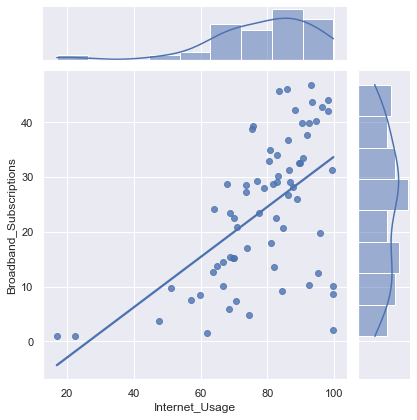

In [68]:

sns.set_theme(color_codes=True)
g = sns.jointplot(x="Internet_Usage", y="Broadband_Subscriptions", data=usage_subs[['Internet_Usage','Broadband_Subscriptions']], ci=None,  kind="reg")


### Summary 

-  Top 5 countries with the highest internet use (by population share) 1990-2019 are :
   -  Kosovo
   -  Curacao
   -  Iceland
   -  Norway
   -  Sweden
-  Number of people had internet access in [Kosovo-Curacao-Iceland-Norway-Sweden]  in 2019 are 
   -  Sweden	9,702,513
   - 	Norway	5,241,320
   -	Iceland	357,179
   -  Kosovo   No Data
   -  Curacao  No Data
  

  
- Top 5 countries with the highest internet use (by population share) 2019 are :
  - Bahrain	
  - Qatar	
  - Kuwait	
  - United Arab Emirates	
  - Denmark	

-  Number of people had internet access in [Bahrain-Qatar-Kuwait-United Arab Emirates-Denmark]  in 2019 are 
     -  United Arab Emirates	9,133,361
     -  Denmark	            5,682,653
     -  Kuwait	               4,420,795
     -  Qatar	               2,797,495
     -  Bahrain	            1,489,735


-  the top 5 countries with the highest internet use for each of the following regions:
     - 'Middle East & North Africa'
       - United Arab Emirates    
       - Bahrain                 
       - Qatar                   
       - Malta                   
       - Israel(Occupation state)               
     
     - 'Latin America & Caribbean'
       - Curacao                  
       - Cayman Islands           
       - Barbados                 
       - Aruba                    
       - Saint Kitts and Nevis    

     - 'East Asia & Pacific'
       - South Korea    
       - New Zealand    
       - Japan          
       - Australia      
       - Singapore      
      
     - 'South Asia'
        - Maldives     
        - Bhutan        
        - Sri Lanka     
        - India         
        - Pakistan      
     
     - 'North America'
         - Bermuda          
         - Canada          
         - United States    
     
     - 'Europe & Central Asia'
        - Iceland        
        - Norway        
        - Sweden         
        - Denmark        
        - Netherlands   



- Highest internet use for All regions over time is :
  - 'North America'

- Lowest internet use for All regions over time is :
  - 'South Asia'

- Top  5 countries with the most internet users in 2020 :
  - China	 1,003,218,650
  - India	600,446,441
  - United States	305,371,298
  - Brazil	173,419,624
  - Indonesia	146,059,763

- There is a corr between 'Internet_Usage' & 'Broadband_Subscriptions' and it is = 0.557518

























